In [1]:
#what we want

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
abalone  = pd.read_csv("abalone.data",sep =',',header=None)
print(abalone.keys())
abalone.head()
#Predicting the age of abalone from physical measurements. The age of
   #abalone is determined by cutting the shell through the cone, staining it,
   #and counting the number of rings through a microscope -- a boring and
   #time-consuming task.  Other measurements, which are easier to obtain, are
   #used to predict the age.  Further information, such as weather patterns
   #and location (hence food availability) may be required to solve the problem.


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
#check if there is any null data
abalone.isnull().sum() #-----> count the missing data in each column
abalone.isnull().any() #-----> if shows false it means that theres no missing data

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [4]:
#add the names to the columns, rings is what we want to predict
feature_names = ['sex','lenght','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
abalone  = pd.read_csv("abalone.data",sep =',',names = feature_names)
abalone.head()

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


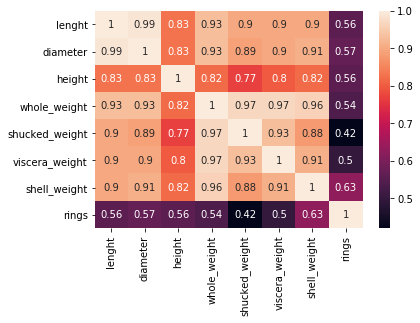

In [5]:
# let's see posible correlations betweeen the features, i'll pick the ones with high correlation with the target but not with the others
corr_matrix = abalone.corr().round(2)
sns.heatmap(corr_matrix,annot=True)

In [6]:
# it seems like the features have more correlation between them than with the target :P , that would affect the model's acduracy
#---> non-linear regression and i could use pca to reduce the dimension


#using pca to lower the dimesion of the data
feature_names = ['lenght','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']
from sklearn.preprocessing import StandardScaler
x = abalone.loc[:,feature_names].values
y = abalone['rings']
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pcdataframe = pd.DataFrame(pc,columns= ['pc1','pc2'])
pcdataframe = pd.concat([pcdataframe, abalone[['rings']]], axis = 1)
pcdataframe.head()

,pc1,pc2,rings
0,-1.756019,-0.390532,15
1,-3.362734,-0.105153,7
2,-0.482338,0.252055,9
3,-1.509041,0.207608,10
4,-3.654006,-0.272819,7


In [ ]:
# note: the features are more highly correlated between them than with the target 

In [7]:
# non-linear regression with pca data, fit diferrent models and see wich hae better performancefrom sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
###
x_train, x_test, y_train, y_test = train_test_split(pc,y,random_state=0)
regressor = LinearRegression().fit(x_train,y_train)
y_ = regressor.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_)))
print('the rmse is {}'.format(rmse))
regressor.score(x_test,y_test)

the rmse is 2.4607770243193543


0.423733426238724

In [8]:
#non-linear regression without pca
>>> from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
regressor2 = LinearRegression().fit(x_train,y_train)
y_ = regressor2.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_)))
print('the rmse is {}'.format(rmse))
r2_score(y_test, y_) 
#wthout pca i got better performance, lets do something to have better results

the rmse is 2.210342162663199


0.5350589215087775

2.480848328829825


In [77]:
# maybe another kind of regression could usefull, i'll try the ridge regression

In [14]:
#with the pca values, this model works better with a big amount of data
from sklearn.linear_model import Ridge
ridge_r = Ridge(alpha=1.0)
x_train, x_test, y_train, y_test = train_test_split(pc,abalone['rings'],random_state=0)

ridge_r.fit(x_train,y_train)
ridge_r.score(x_test,y_test)

0.4236794616878411

In [25]:
#without the pca values
x = abalone[['lenght','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']]
y = abalone['rings']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
ridge_r.fit(x_train,y_train)
ridge_r.score(x_test,y_test)
ridge_r.predict(0.455 	0.365 	0.095 	0.5140 	0.2245 	0.1010 	0.150)

0.5310495765281638

In [ ]:
# the non pca trained models have better scores; 0.53 R2 and rmse 2.21 values is not bad at all, the models are ready to be used to know the age of the abalones without wasting a lot of time in the process that doing manually requires